# Title: Predicting Sales Based on Advertising Spend

### Introduction
In today's competitive market, companies are constantly looking for ways to optimize their advertising budgets to maximize sales. Understanding the relationship between advertising expenditure across various media channels and sales performance is crucial for making informed marketing decisions. This dataset contains data on advertising expenditures across three
channels: TV, Radio, and Newspaper, along with the resulting sales figures.


### Objective:
The objective of this analysis is to build a predictive model that can accurately forecast sales based on the amount of money spent on TV, Radio, and Newspaper advertisements. This model will help in understanding the impact of each advertising channel on sales and in making strategic decisions regarding budget allocation to maximize sales.


### Dataset Description:
The dataset consists of the following columns:
1. TV: Amount of money spent on TV advertising (in thousands of dollars).
2. Radio: Amount of money spent on Radio advertising (in thousands of dollars).
3. Newspaper: Amount of money spent on Newspaper advertising (in thousands of dollars).
4. Sales: Sales of the product (in thousands of units).

## Importing Labraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
%matplotlib inline

## Read the Dataset

In [2]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Exploring the Dataset

In [3]:
##head method
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#info method 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#shape method
df.shape

(200, 4)

In [6]:
#describe method
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#null method
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


### Data Analysis

### Univariate Analysis

<Axes: xlabel='Newspaper', ylabel='Count'>

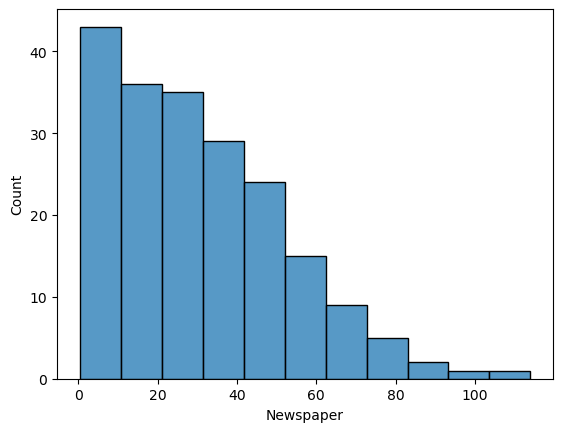

In [8]:
sns.histplot(data=df,x='Newspaper')

<Axes: xlabel='Radio', ylabel='Density'>

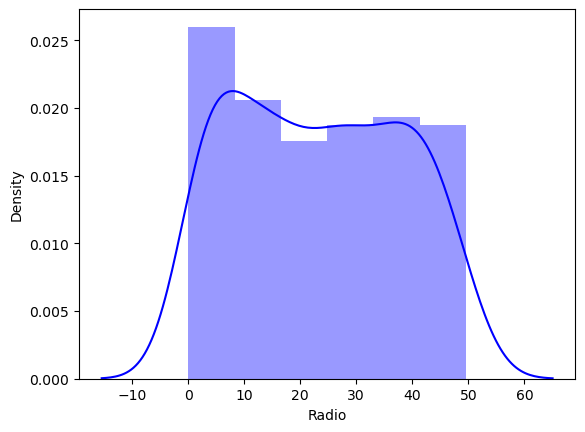

In [9]:
sns.distplot(df['Radio'],color='blue')

<Axes: xlabel='Sales', ylabel='Density'>

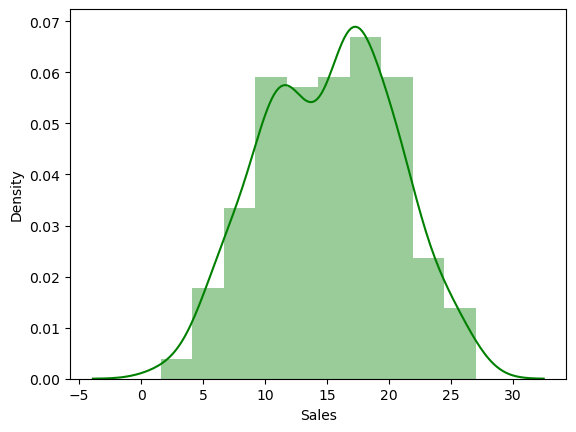

In [10]:
sns.distplot(df['Sales'],color='green')

<Axes: xlabel='TV', ylabel='Density'>

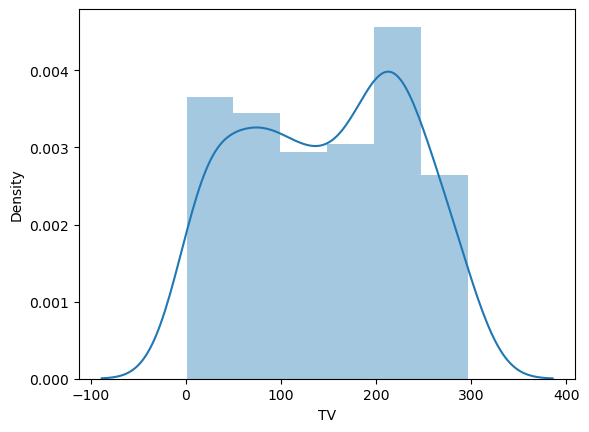

In [11]:
sns.distplot(df['TV'])

<Axes: xlabel='TV', ylabel='Count'>

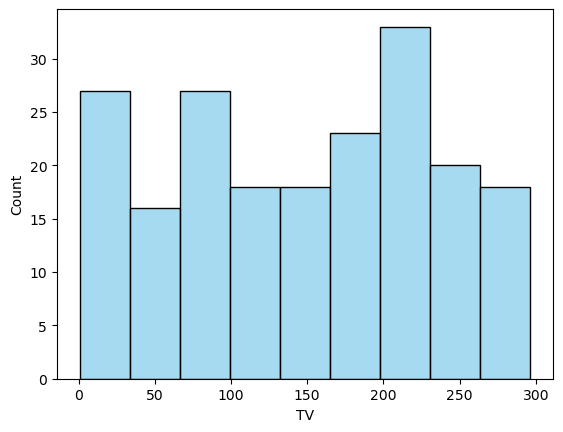

In [12]:
sns.histplot(data=df,x='TV',color='skyblue')

### Bivariate Analysis

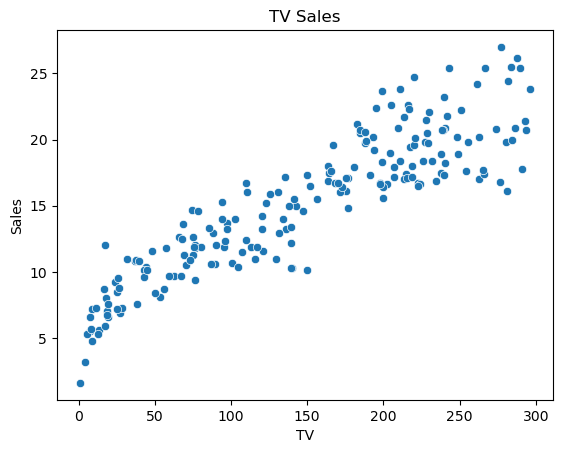

In [13]:
# using scatterplot
sns.scatterplot(data=df,x='TV',y='Sales')
plt.title("TV Sales")
plt.show()

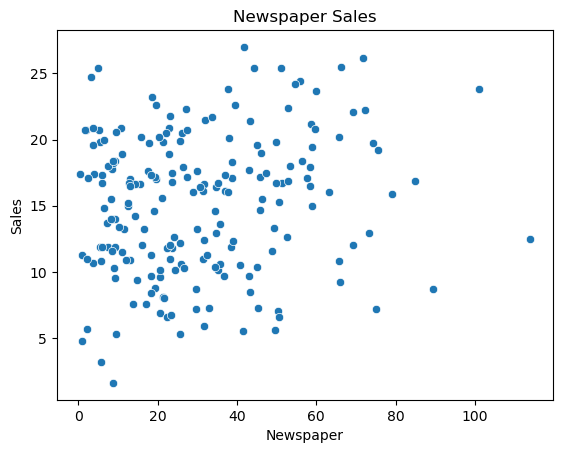

In [14]:
sns.scatterplot(data=df,x='Newspaper',y='Sales')
plt.title("Newspaper Sales")
plt.show()

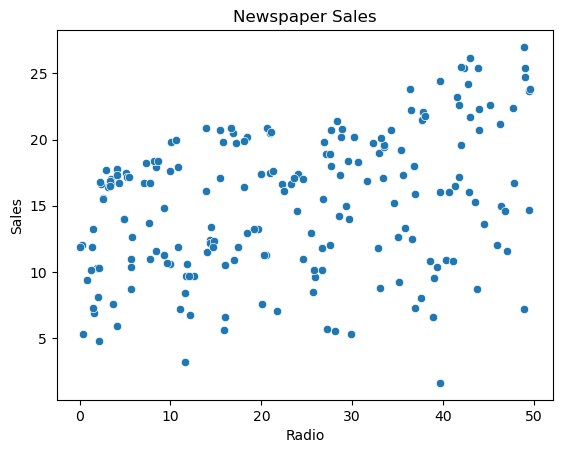

In [15]:
sns.scatterplot(data=df,x='Radio',y='Sales')
plt.title("Newspaper Sales")
plt.show()

Text(0, 0.5, 'Frequency')

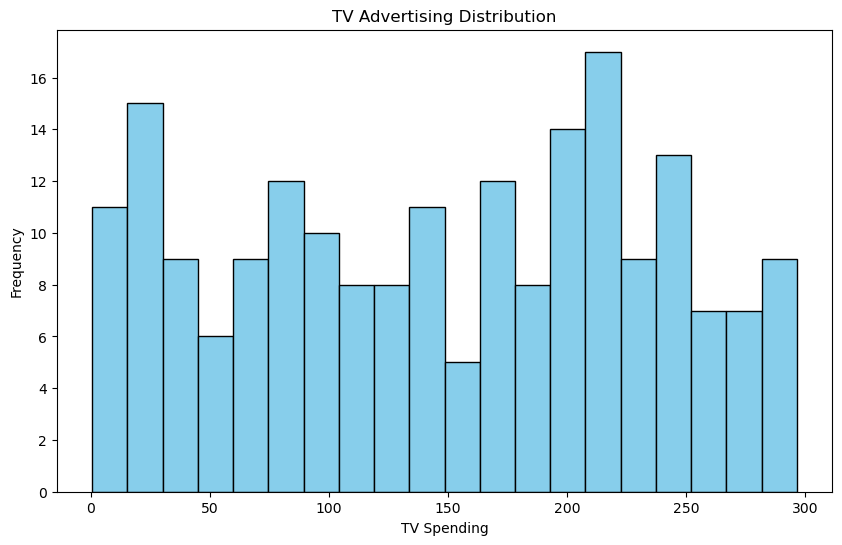

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['TV'], bins=20, color='skyblue', edgecolor='black')
plt.title('TV Advertising Distribution')
plt.xlabel('TV Spending')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

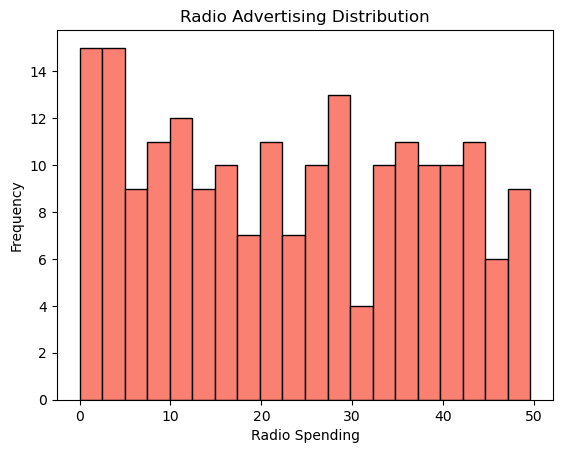

In [17]:
plt.hist(df['Radio'], bins=20, color='salmon', edgecolor='black')
plt.title('Radio Advertising Distribution')
plt.xlabel('Radio Spending')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

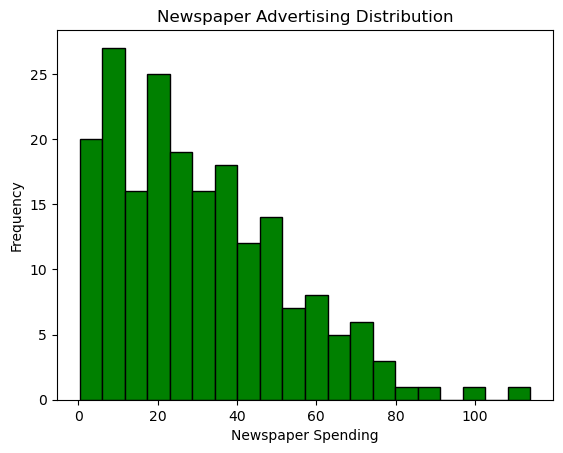

In [18]:
plt.hist(df['Newspaper'], bins=20, color='green', edgecolor='black')
plt.title('Newspaper Advertising Distribution')
plt.xlabel('Newspaper Spending')
plt.ylabel('Frequency')

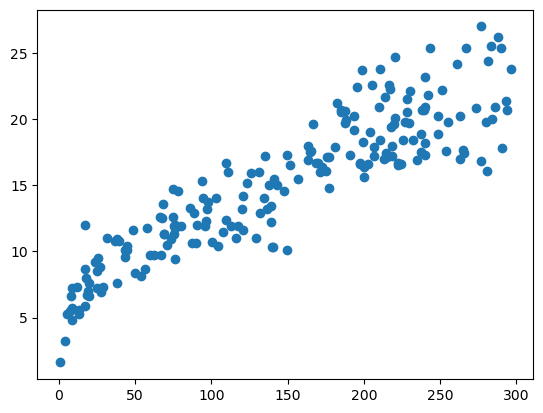

In [19]:
plt.scatter(df['TV'], df['Sales'])

In [20]:
#corelation analysis
correlation = df[['TV', 'Newspaper', 'Radio', 'Sales']].corr()
print(correlation)

                 TV  Newspaper     Radio     Sales
TV         1.000000   0.056648  0.054809  0.901208
Newspaper  0.056648   1.000000  0.354104  0.157960
Radio      0.054809   0.354104  1.000000  0.349631
Sales      0.901208   0.157960  0.349631  1.000000


In [21]:
#channel contributions
total_sales = df['Sales'].sum()
channel_contributions = (df[['TV', 'Newspaper', 'Radio']].sum() / total_sales) * 100
print(channel_contributions)

TV           971.828426
Newspaper    201.936486
Radio        153.755659
dtype: float64


In [22]:
#Advertising Return on Investment
df['TV_ROI'] = (df['Sales'] - df['TV']) / df['TV']
df['Newspaper_ROI'] = (df['Sales'] - df['Newspaper']) / df['Newspaper']
df['Radio_ROI'] = (df['Sales'] - df['Radio']) / df['Radio']
print(df[['TV_ROI', 'Newspaper_ROI', 'Radio_ROI']].mean())

TV_ROI          -0.825866
Newspaper_ROI    0.415487
Radio_ROI             inf
dtype: float64


## Data Processing

In [23]:
X=df[['Newspaper','TV','Radio']]
y=df[['Sales']]

In [24]:
#split the data into trian and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train.head()

,Newspaper,TV,Radio
137,59.7,273.7,28.9
163,7.4,163.5,36.8
111,23.2,241.7,38.0
123,12.4,123.1,34.6
109,5.5,255.4,26.9


In [26]:
X_train.shape

(160, 3)

In [27]:
X_test.head()

,Newspaper,TV,Radio
112,2.4,175.7,15.4
29,40.8,70.6,16.0
182,29.7,56.2,5.7
199,8.7,232.1,8.6
193,3.6,166.8,42.0


In [28]:
y_train.head()

,Sales
137,20.8
163,18.0
111,21.8
123,15.2
109,19.8


In [29]:
y_train.shape

(160, 1)

## Model Evaluation

In [30]:
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
lr.coef_

array([[0.00233839, 0.05536768, 0.102883  ]])

In [33]:
lr.intercept_

array([4.49983137])

## Predicting the Model

In [34]:
y_pred=lr.predict(X_test)
y_pred

array([[15.81794247],
       [10.15032354],
       [ 8.26737799],
       [18.25580684],
       [18.06466407],
       [17.24354571],
       [ 8.81294515],
       [22.04513076],
       [12.38208193],
       [21.03691149],
       [ 9.58287515],
       [20.13791992],
       [10.69692702],
       [ 9.05217041],
       [17.19403767],
       [10.33653542],
       [ 8.63490536],
       [17.27389797],
       [18.24930692],
       [19.29279069],
       [18.94026036],
       [19.46168254],
       [11.11298733],
       [10.6675807 ],
       [18.0316489 ],
       [14.58414874],
       [16.58323824],
       [ 9.27911751],
       [18.82160438],
       [17.18558892],
       [20.11211809],
       [16.22950562],
       [15.87936272],
       [14.05507975],
       [ 7.89699942],
       [12.12455603],
       [21.74608041],
       [21.4076981 ],
       [19.58225049],
       [19.50042709]])

## RMSE (Root mean squared error)
The root mean square error (RMSE) is a metric that tells us how far apart our predicted values are from our observed values in a model, on average.

In [35]:
r2s=r2_score(y_test,y_pred)
print("R-Square Score",r2s)

R-Square Score 0.8407131803267821


## MSE (Mean squared error)
Mean Squared Error (MSE) measures the amount of error in a statistical model

In [36]:
mse=mean_squared_error(y_test,y_pred)
print("Mean square error (MSE): ",mse)

Mean square error (MSE):  3.091721330322733


## Making Prediction on Sales

In [37]:
e=[[100,50,25]]
print("Predicted Sales:",lr.predict(e))

Predicted Sales: [[10.07412894]]


## visualization

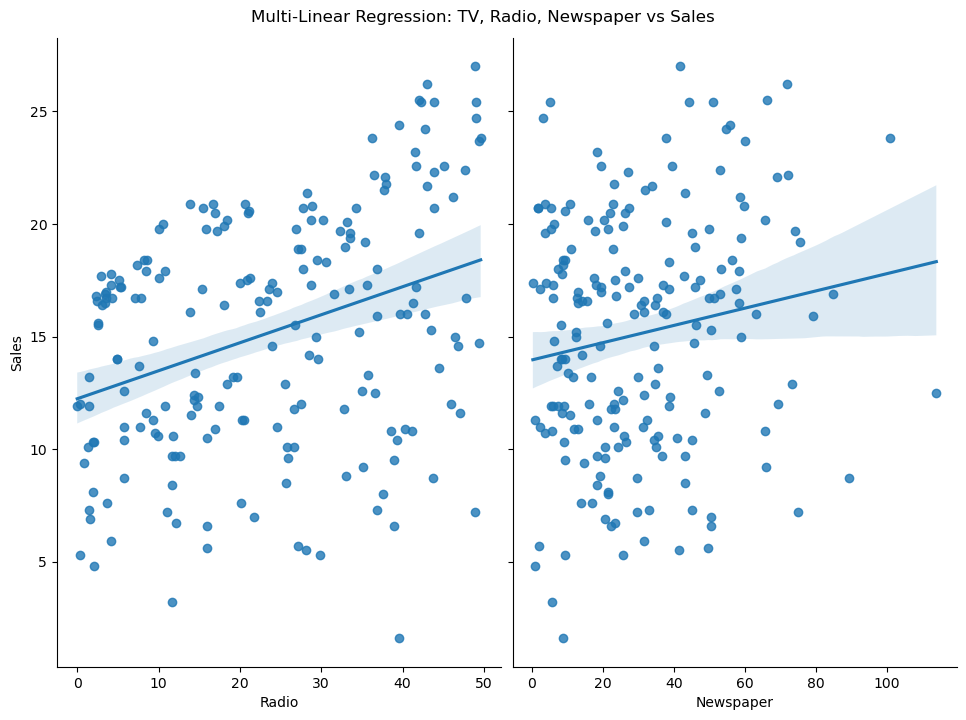

In [38]:
sns.pairplot(df, x_vars=['Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')
plt.suptitle('Multi-Linear Regression: TV, Radio, Newspaper vs Sales', y=1.02)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

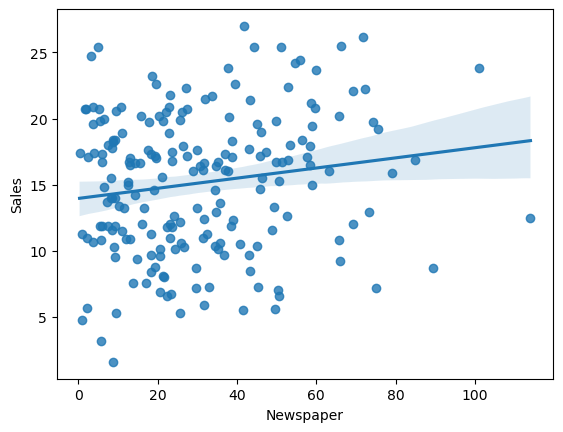

In [39]:
sns.regplot(data=df,x='Newspaper',y='Sales')
plt.show

## Conclusion
In this project, the aim was to predict sales based on advertising spend, focusing on machine learning techniques. Through rigorous analysis, it was found that linear regression served as a reliable model for this task. The analysis uncovered a positive correlation between advertising expenditure and sales, highlighting the significance of investment in advertising for driving sales revenue.